<div style="text-align: justify;">
<div class="page" title="Page 5">
<div class="layoutArea">
<div class="column">
<div class="page" title="Page 5">
<div class="layoutArea">
<div class="column">

<p style="text-align: center;"><span style="font-size: xx-large; font-family: arial, helvetica, sans-serif;"><strong>TP1:</strong></span></p>
<div class="page" title="Page 5">
<div class="layoutArea">
<div class="column">
<p style="text-align: center;"><span style="font-size: xx-large; font-family: arial, helvetica, sans-serif;"><strong>Représentation numérique des systèmes de dimension infinie</strong></span></p>
</div>
</div>
</div>

VILLEGAS Edith, MANGATA Laury
## I- Introduction
<div style="text-align: justify;">
<div class="page" title="Page 5">
<div class="layoutArea">
<div class="column">
<div class="page" title="Page 5">
<div class="layoutArea">
<div class="column">
<p><span>Dans ce TP, il s'agit de considérer une particule quantique de masse $m$ dont l'Hamiltonien est donné par l'équation suivante:$H=-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+V(x)$. L'objectif est de réaliser une représentation approchée finie du système afin de l'implémenter numériquement.</p>
<p><span>Pour cela, la particule est supposée localiser dans un intervalle $[0,L]$. Cela signifie que la fonction d'onde expérimentale ne va pas parcourir toute la totalité de l'espace infini de manière significative et sur une durée acceptable.</p>
<p><span> De ce fait, on considère une partition régulière de ${x_0,x_1,...,x_N}$ où le pas de la partition $\Delta x=x_{i+1}-x_i$, $x_0=0$ et $x_N=L$. La représentation numérique sera fondée sur cette partition. </p>
<p><span> Nous étudierons ici trois cas où les potentiels donnés seront différents: Une particule dans un boite, un oscillateur harmonique et une molécule $H_2^+$.</span></div>
</div>
</div>
<span style="font-size: small;"><strong><br /></strong></span></div>






In [105]:
import numpy as np
import scipy.integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

####  Définition des variables:

## II- Particule dans une boîte
</ol>
<div style="text-align: justify;">
<div class="page" title="Page 5">
<div class="layoutArea">
<div class="column">
<div class="page" title="Page 5">
<div class="layoutArea">
<div class="column">
<p><span> Pour une particule dans une boîte $[0,xmax]$, le potentiel est donné par les relations suivantes:</p>
    
$$
\left \{ 
\begin{array}{r c l} 
+\infty \qquad si\qquad x=0\\
0 \quad si \quad x \in ]0,xmax[\\
+\infty \quad si\qquad x=xmax
\end{array}
\right.
$$
<p><span>Le fait d'avoir des murs infinis pose problème et c'est la raison pour laquelle l'infini est remplacé par $10^{10}$ qui est une valeur suffisamment grande.</p>

In [106]:
xmax = 10
m = 1
Npas = 30
DeltaX = xmax/Npas
Xd = np.zeros(Npas)
valV = np.zeros(Npas)

for i in range (0,Npas):
    Xd[i] = i*DeltaX
    valV[i] = V(Xd[i]) 
    
Vmat = np.diag(valV)

#### Définition de la fonction potentiel de la particule:

In [107]:
def V(x):
    if x==0:
        return 10**10
    if 0<x<xmax:
        return 0
    if x==xmax:
        return 10**10

#### Définition des Hamiltoniens numériques du système
##### Hamiltonien par différence finie

In [108]:
Hdf=-2*np.identity(Npas)
for i in range (0,Npas-1):
    Hdf[i,i+1]=1
    Hdf[i+1,i]=1
Hdf = -1/(2*m*DeltaX**2)*Hdf
Hdf = Hdf + Vmat

##### Hamiltonien par la méthode de la variable discrète

In [109]:
Hdvr = np.zeros((Npas,Npas))

for i in range (0,Npas-1):
    for j in range(0,Npas-1):
        if i==j:
            Hdvr[i,i]=np.pi**2*((Npas+1)**2+2)/(3*xmax**2*2*m)
        else:
            Hdvr[i,j]=((-1)**(j-i)*2*np.pi**2)/(xmax**2*np.sin(((j-i)*np.pi)/(Npas+1))**2*2*m)
Hdvr = Hdvr + Vmat

#### Détermination des spectres 

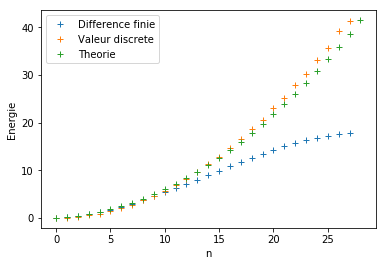

In [110]:
n = np.arange(29)+1
SpTH = (np.pi**2*n**2)/(2*m*xmax**2) #spectre théorique
SpFD = LA.eigvalsh(Hdf); #spectre différence finie
SpDVR = LA.eigvalsh(Hdvr); # spectre variable discrète
SpFD  = SpFD[0:28]
SpDVR  = SpDVR[0:28]

plt.figure()
plt.plot(SpFD,'+',label='Difference finie')
plt.plot(SpDVR,'+',label='Valeur discrete')
plt.plot(SpTH,'+',label='Theorie')
plt.xlabel('n')
plt.ylabel('Energie')
plt.legend()

Graphiquement, il est possible de constater que le spectre déterminé grâce à la méthode de la Variable discrète est plus près de la théorie. Les valeurs calculées avec la méthode de différences finies sont près de la théorie seulement quand n est petit ($n<15$). Par conséquent, la méthode des Variables discrètes est plus précise. De même, plus le mode augmente plus l'énergie augmente.



#### Définitions des vecteurs propres des Hamiltoniens

In [111]:
valpdf, vectpdf = LA.eigh(Hdf)
vectpdf = (1/np.sqrt(DeltaX))*(np.transpose(vectpdf))

    
valpdvr, vectpdvr = LA.eigh(Hdvr)
vectpdvr = (1/np.sqrt(DeltaX))*(np.transpose(vectpdvr))

#### Définition des fonctions d'ondes

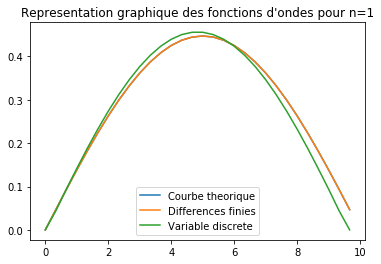

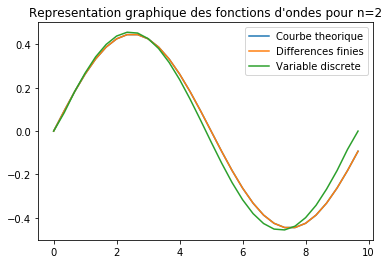

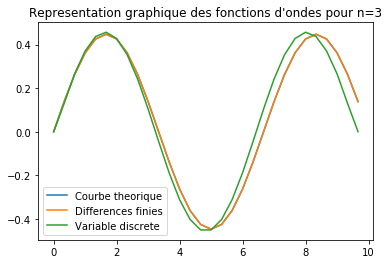

In [112]:
vectpdf[0] = vectpdf[0]
vectpdvr[1] = -vectpdvr[1]
vectpdf[2] = -vectpdf[2]
vectpdf[1] = -vectpdf[1]

for i in range (1,4):
    PhieTH = np.sqrt(2/xmax)*np.sin((i*np.pi*Xd)/xmax)
    plt.figure()
    plt.plot(Xd,PhieTH,label='Courbe theorique')
    plt.plot(Xd,vectpdf[i-1],label='Differences finies')
    plt.plot(Xd,vectpdvr[i],label='Variable discrete')
    title = "Representation graphique des fonctions d'ondes pour n=" +str(i)
    plt.title(title)
    plt.legend()

Pour chaque valeur n correspondant à un mode, les courbes expérimentales collent plus ou moins à la courbe théorique. En effet, un léger décalage est observé avec la méthode de la variable discrète.

## III- Oscillateur Harmonique
</ol>
<div style="text-align: justify;">
<div class="page" title="Page 5">
<div class="layoutArea">
<div class="column">
<div class="page" title="Page 5">
<div class="layoutArea">
<div class="column">
<p><span> Pour cette partie, nous nous intéressons au cas d'un oscillateur harmonique. Son potentiel est alors donné par la relation suivante:</p>
    
    
$$V(x) = \frac{1}{2}k(x - \frac{x_{max}}{2})^2$$
    
Où $k=1u.a$ et on notera $\omega_0=\sqrt{\frac{k}{m}}$

#### Définition du potentiel:

In [113]:
def V_harmonique(x):
    return (1/2)*(x-(xmax/2))**2

valV_harmonique = np.zeros(Npas)

for i in range (0,Npas):
    valV_harmonique[i] = V_harmonique(Xd[i]) 
    
Vmat_harmonique = np.diag(valV_harmonique)

#### Définition des Hamiltoniens

In [114]:
Hdf_harmonique = np.copy(Hdf) - Vmat + Vmat_harmonique
Hdvr_harmonique = np.copy(Hdvr) - Vmat + Vmat_harmonique

#### Définition des spectres 

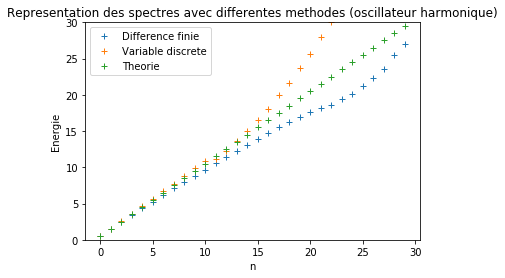

In [115]:
omega = np.sqrt(1/m) 
n_h = np.arange(30)
SpTH_harmonique = omega*(n_h+(1/2))
SpFD_harmonique = LA.eigvalsh(Hdf_harmonique);
SpDVR_harmonique = LA.eigvalsh(Hdvr_harmonique);

plt.figure()
plt.plot(SpFD_harmonique, '+',label='Difference finie')
plt.plot(SpDVR_harmonique, '+',label='Variable discrete')
plt.plot(SpTH_harmonique, '+',label='Theorie')
plt.title('Representation des spectres avec differentes methodes (oscillateur harmonique)')
plt.xlabel('n')
plt.ylabel('Energie')
plt.ylim([0,30])
plt.legend()

On peut remarquer que les deux méthodes fonctionnent bien pour des valeurs de n inférieures à $15$. Cependant, pour des valeurs de n supérieures, les courbes numériques commencent à diverger de la courbe théorique, comme on avait vu précedement pour la particule dans une boîte. Cela peut être dû au fait que le système est infini et est representé par un vecteur infini, donc quand on s'approche de la fin du vecteur on a une marge d'erreur plus grande.  

#### Définition des vecteurs propres de l'hamiltonien

In [116]:
valpdf_harmonique, vectpdf_harmonique = LA.eigh(Hdf_harmonique)
vectpdf_harmonique = (1/np.sqrt(DeltaX))*(np.transpose(vectpdf_harmonique))

valpdvr_harmonique, vectpdvr_harmonique = LA.eigh(Hdvr_harmonique)
vectpdvr_harmonique = (1/np.sqrt(DeltaX))*(np.transpose(vectpdvr_harmonique))

#### Définition des fonctions d'ondes

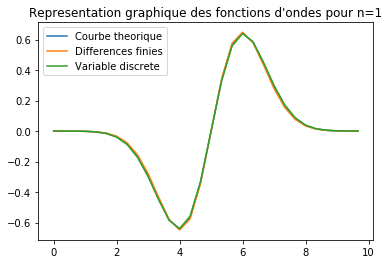

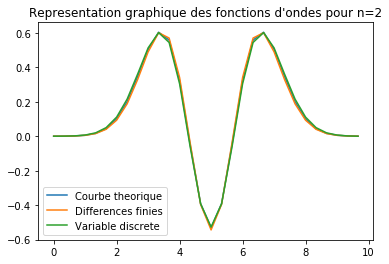

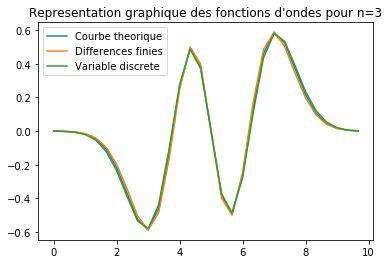

In [117]:
vectpdf_harmonique[2] *= -1
vectpdf_harmonique[3] *= -1
vectpdvr_harmonique[2] *= -1
vectpdvr_harmonique[3] *= -1

for i in range (1,4):
    #calcul de l'harmonique theorique
    c = np.zeros(4)
    c[i] = (1/np.sqrt(math.factorial(i)*2**i))*(1/math.pi**0.25)
    arg = Xd - (xmax/2)
    harmonique_theorique = np.polynomial.hermite.hermval(arg,c)*np.exp(-0.5*arg**2)
    plt.figure()
    plt.plot(Xd,harmonique_theorique,'',label='Courbe theorique')
    plt.plot(Xd,vectpdf_harmonique[i],'',label='Differences finies')
    plt.plot(Xd,vectpdvr_harmonique[i],'',label='Variable discrete')
    title = "Representation graphique des fonctions d'ondes pour n=" +str(i)
    plt.title(title)
    plt.legend()



Lorsqu'on compare les courbes pour chacun des modes on observe que toutes les courbes se confondent à leur courbe théorique. Notamment pour un mode $n$, on observe $n+1$ pics qui s'opposent. C'est-à-dire que si le premier pic possède un maximum, le deuxième possède un minimum et vice-versa.

## IV- Molécule $H_2^+$
<div style="text-align: justify;">
<div class="page" title="Page 5">
<div class="layoutArea">
<div class="column">
<div class="page" title="Page 5">
<div class="layoutArea">
<div class="column">
<p><span> Enfin, nous étudions le cas de la molécule $H_2^+$ dans l'état électronique liant $^2\sum_g^+{}$ du point de vue de ses états vibrationnels. Pour le cas de la molécule les données sont modifiées et le potentiel de la vibration (anharmonique) est alors donnée par la relation suivante:</p>

$$V(x) = V_0(e^{-2a(x-x_0)}-2e^{-a(x-x_0)})$$

#### Définition des variables:

In [118]:
xmax_mol = 15
m_mol = 911.489
Npas_mol = 50
V_0 = 0.10262
a = 0.72
x_0 = 2
DeltaX_mol = (xmax_mol-x_0)/Npas_mol
Xd_mol = np.zeros(Npas_mol)
    

#### Définition du potentiel:

In [119]:
def V_molecule(x):
    return V_0*(np.exp(-2*a*(x-x_0)) - 2*np.exp(-a*(x-x_0)))

valV_mol = np.zeros(Npas_mol)

for i in range (0,Npas_mol):
    Xd_mol[i] = i*DeltaX_mol
    valV_mol[i] = V_molecule(Xd_mol[i]) 

Vmat_mol = np.diag(valV_mol)

#### Comparaison des potentiels d'un oscillateur harmonique et d'une molécule $H_2^+$

Text(0.5,1,"Potentiel d'un oscillateur Harmonique")

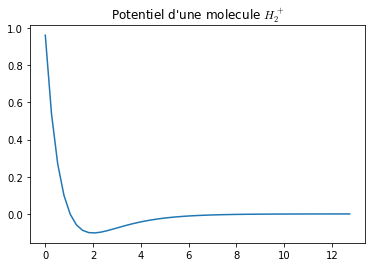

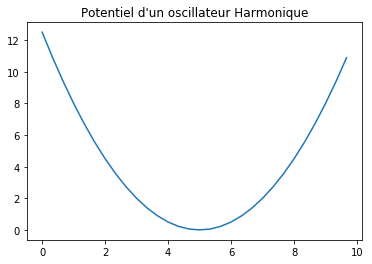

In [120]:
plt.figure()
plt.plot(Xd_mol, valV_mol)
plt.title("Potentiel d'une molecule $H_2^+$")
plt.figure()
plt.plot(Xd, valV_harmonique)
plt.title("Potentiel d'un oscillateur Harmonique")

<p><span>En comparant le potentiel de la molécule au potentiel de l'oscillateur harmonique, on constate que l'on a deux graphes différents. En effet, pour le potentiel de l'oscillateur harmonique on obtient un puit de potentiel. À la différence, pour le potentiel de la molécule le puit est moins profond, une région constante est observée à la fin de la courbe. </p>

#### Définition des Hamiltoniens
##### Hamiltonien par différence finie

In [121]:
Hdf_mol=-2*np.identity(Npas_mol)
for i in range (0,Npas_mol-1):
    Hdf_mol[i,i+1]=1
    Hdf_mol[i+1,i]=1
Hdf_mol = -1/(2*m_mol*DeltaX_mol**2)*Hdf_mol
Hdf_mol = Hdf_mol + Vmat_mol

##### Hamiltonien par la méthode de la variable discrète

In [122]:
Hdvr_mol = np.zeros((Npas_mol,Npas_mol))
for i in range (0,Npas_mol-1):
    for j in range(0,Npas_mol-1):
        if i==j:
            Hdvr_mol[i,i]=np.pi**2*((Npas_mol+1)**2+2)/(3*xmax_mol**2*2*m_mol)
        else:
            Hdvr_mol[i,j]=((-1)**(j-i)*2*np.pi**2)/(xmax_mol**2*np.sin(((j-i)*np.pi)/(Npas_mol+1))**2*2*m_mol)
Hdvr_mol = Hdvr_mol + Vmat_mol            

#### Définition des spectres

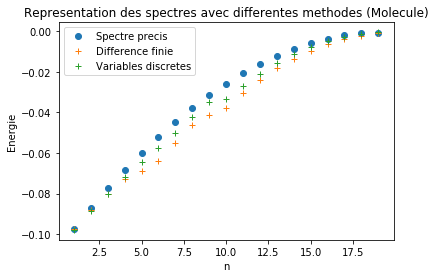

In [123]:
n_mol = np.arange(19)+1
SP_pp = [-9.731E-2,-8.711E-2,-7.748E-2,-6.841E-2,-5.991E-2,-5.195E-2, -4.459E-2,-3.778E-2,-3.153E-2,-2.585E-2,-2.073E-2,-1.618E-2,-1.218E-2,-0.876E-2,-0.590E-2,-0.360E-2,-0.187E-2,-0.070E-2,-0.062E-2]
SpFD_mol = LA.eigvalsh(Hdf_mol);
SpDVR_mol = LA.eigvalsh(Hdvr_mol);
plt.figure()
plt.plot(n_mol, SP_pp,'o',label="Spectre precis")
plt.plot(n_mol, SpFD_mol[0:19],'+',label="Difference finie")
plt.plot(n_mol, SpDVR_mol[0:19],'+',label="Variables discretes")
plt.title("Representation des spectres avec differentes methodes (Molecule)")
plt.xlabel('n')
plt.ylabel('Energie')
plt.legend()

Si on fait un zoom sur le graphique pour voir juste la partie où on peut comparer à les valeurs données, on remarque qu'à nouveau, la méthode de la variable discrète est plus précise. Les deux méthodes s'approchent des valeur données. 

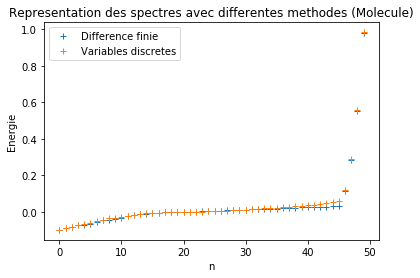

In [124]:
plt.figure()
plt.plot(SpFD_mol,'+',label="Difference finie")
plt.plot(SpDVR_mol,'+',label="Variables discretes")
plt.title("Representation des spectres avec differentes methodes (Molecule)")
plt.xlabel('n')
plt.ylabel('Energie')
plt.legend()

Pour des valeurs de n qui s'approchent de 50 (la limite du vecteur), les valeurs du spectre commencent à diverger. 

#### Définition des vecteurs propres de l'Hamiltonien:

In [125]:
valpdf_mol, vectpdf_mol = LA.eigh(Hdf_mol)
vectpdf_mol = (1/np.sqrt(DeltaX))*(np.transpose(vectpdf_mol))

valpdvr_mol, vectpdvr_mol = LA.eigh(Hdvr_mol)
vectpdvr_mol = (1/np.sqrt(DeltaX_mol))*(np.transpose(vectpdvr_mol))

#### Définition des fonctions d'ondes:

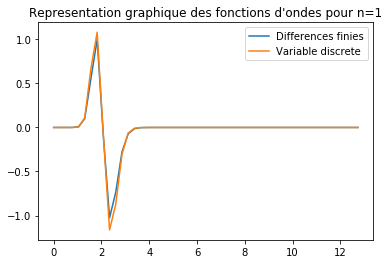

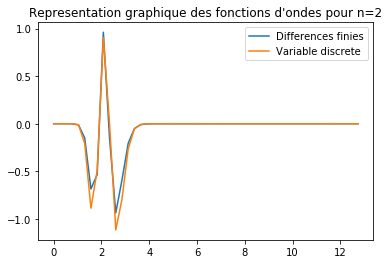

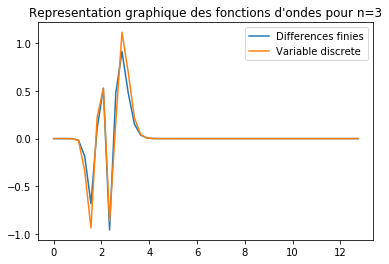

In [126]:
for i in range (1,4):
    plt.figure()
    if i==3:
        vectpdf_mol[i]*=-1
    plt.plot(Xd_mol,vectpdf_mol[i],'',label='Differences finies')
    plt.plot(Xd_mol,vectpdvr_mol[i],'',label='Variable discrete')
    title = "Representation graphique des fonctions d'ondes pour n=" +str(i)
    plt.title(title)
    plt.legend()

En comparant les graphes, on constate que comme pour le cas de l'oscillateur harmonique, si l'on observe le mode $n$, on observe $n+1$ pics qui s'opposent un à un. 

#### Étude de la dépendence avec $x_{max}$ et $N_{pas}$

##### Définition de la fonction pour calculer le Spectre:

In [127]:
def molecule_H2(xmax_mol, Npas_mol):
    m_mol = 911.489
    V_0 = 0.10262
    a = 0.72
    x_0 = 2
    DeltaX_mol = (xmax_mol-x_0)/Npas_mol
    Xd_mol = np.zeros(Npas_mol)
    valV_mol = np.zeros(Npas_mol)
    
    for i in range (0,Npas_mol):
        Xd_mol[i] = i*DeltaX_mol
        valV_mol[i] = V_molecule(Xd_mol[i]) 
        
    Hdf_mol=-2*np.identity(Npas_mol)
    for i in range (0,Npas_mol-1):
        Hdf_mol[i,i+1]=1
        Hdf_mol[i+1,i]=1
    Hdf_mol = -1/(2*m_mol*DeltaX_mol**2)*Hdf_mol
    
    Hdvr_mol = np.zeros((Npas_mol,Npas_mol))
    for i in range (0,Npas_mol-1):
        for j in range(0,Npas_mol-1):
            if i==j:
                Hdvr_mol[i,i]=np.pi**2*((Npas_mol+1)**2+2)/(3*xmax_mol**2*2*m_mol)
            else:
                Hdvr_mol[i,j]=((-1)**(j-i)*2*np.pi**2)/(xmax_mol**2*np.sin(((j-i)*np.pi)/(Npas_mol+1))**2*2*m_mol)
                
    Vmat_mol = np.diag(valV_mol)
    Hdf_mol = Hdf_mol + Vmat_mol
    Hdvr_mol = Hdvr_mol + Vmat_mol
    
    SpFD_mol = LA.eigvalsh(Hdf_mol);
    SpDVR_mol = LA.eigvalsh(Hdvr_mol);
    
    return SpFD_mol, SpDVR_mol


##### Influence de $xmax$ sur les spectres:

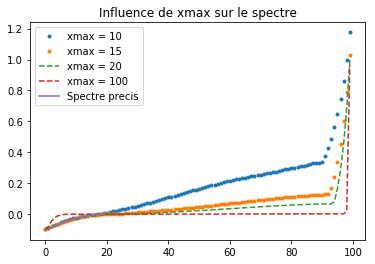

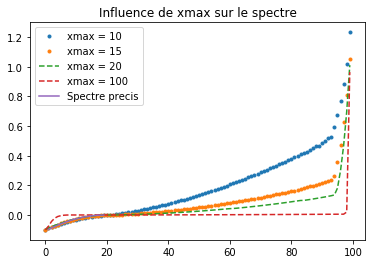

In [128]:
SpFD_mol_data1, SpDVR_mol_data1 = molecule_H2(10, 100)
SpFD_mol_data2, SpDVR_mol_data2 = molecule_H2(15, 100)
SpFD_mol_data3, SpDVR_mol_data3 = molecule_H2(20, 100)
SpFD_mol_data4, SpDVR_mol_data4 = molecule_H2(100, 100)

plt.figure(1)
plt.plot(SpFD_mol_data1,'.', label = 'xmax = 10')
plt.plot(SpFD_mol_data2,'.', label = 'xmax = 15')
plt.plot(SpFD_mol_data3,'--', label = 'xmax = 20')
plt.plot(SpFD_mol_data4,'--', label = 'xmax = 100')
plt.plot(n_mol, SP_pp,'',label="Spectre precis")
plt.title("Influence de xmax sur le spectre")
plt.legend()

plt.figure(2)
plt.plot(SpDVR_mol_data1,'.', label = 'xmax = 10')
plt.plot(SpDVR_mol_data2,'.', label = 'xmax = 15')
plt.plot(SpDVR_mol_data3,'--', label = 'xmax = 20')
plt.plot(SpDVR_mol_data4,'--', label = 'xmax = 100')
plt.plot(n_mol, SP_pp,label="Spectre precis")
plt.title("Influence de xmax sur le spectre")
plt.legend()

Nous avons calculé le spectre avec $4$ valeurs de $xmax$. Plus la valeur de $xmax$ est grande, plus la courbe obtenue diverge du spectre donné. 

##### Influence de $Npas$ sur les spectres:

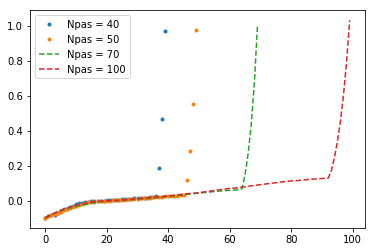

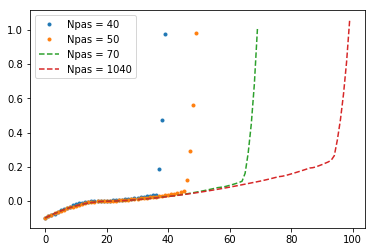

In [129]:
SpFD_mol_data1, SpDVR_mol_data1 = molecule_H2(15, 40)
SpFD_mol_data2, SpDVR_mol_data2 = molecule_H2(15, 50)
SpFD_mol_data3, SpDVR_mol_data3 = molecule_H2(15, 70)
SpFD_mol_data4, SpDVR_mol_data4 = molecule_H2(15, 100)

plt.figure(1)
plt.plot(SpFD_mol_data1,'.', label = 'Npas = 40')
plt.plot(SpFD_mol_data2,'.', label = 'Npas = 50')
plt.plot(SpFD_mol_data3,'--', label = 'Npas = 70')
plt.plot(SpFD_mol_data4,'--', label = 'Npas = 100')
plt.legend()

plt.figure(2)
plt.plot(SpDVR_mol_data1,'.', label = 'Npas = 40')
plt.plot(SpDVR_mol_data2,'.', label = 'Npas = 50')
plt.plot(SpDVR_mol_data3,'--', label = 'Npas = 70')
plt.plot(SpDVR_mol_data4,'--', label = 'Npas = 1040')
plt.legend()

Pour étudier l'influence du nombre de pas sur le résultat, nous avons fait les calculs avec $4$ valeurs différentes de Npas. En conséquence, l'observation faite est que plus la valeur de $Npas$ est grande plus l'énergie du spectre diverge pour des modes plus élevés.

## V- Conclusion
<div style="text-align: justify;">
<div class="page" title="Page 5">
<div class="layoutArea">
<div class="column">
<div class="page" title="Page 5">
<div class="layoutArea">
<div class="column">
<p><span>     </p>

<p><span>  Nous avons calculé numériquement les spectres et les fonctions d'onde pour trois types de potentiel différents. Pour les trois cas, on a constaté que les valeurs du spectre divergent vers le bord pour chacune des méthodes appliquées.</span></div>

<p><span> Nous avons aussi étudié l'influence de $xmax$ et $Npas$ sur les spectres obtenus pour le cas de la molécule $H_2^+$. En conclusion, nous avons pu constater que $xmax$ joue sur la forme de la courbe du spectre. Alors que pour $Npas$ influe sur la divergence du spectre lorsque la valeur du mode augmente.   </p>
</div>
</div>
<span style="font-size: small;"><strong><br /></strong></span></div>



